# NATMI 

In [1]:
lib = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy'
import sys
sys.path.append(lib)
from utilities.package_importing import *
import scipy.stats as stats

### All pairs:

In [2]:
ROOT_PATH = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\outputs\NATMI\executions\tumor_CD8_myeloid_21.3.22'
FILE = 'Edges_lrc2p.csv'
df = pd.read_csv(join(ROOT_PATH, FILE))

In [3]:
df#.sort_values('Receptor detection rate', ascending = False).iloc[:, 4:]

Sending cluster Ligand symbol Receptor symbol     Target cluster  \
0           CD8_cluster_1           A2M            LRP1      CD8_cluster_1   
1           CD8_cluster_1           A2M            LRP1      CD8_cluster_2   
2           CD8_cluster_1           A2M            LRP1      CD8_cluster_3   
3           CD8_cluster_1           A2M            LRP1      CD8_cluster_4   
4           CD8_cluster_1           A2M            LRP1      CD8_cluster_5   
...                   ...           ...             ...                ...   
995531  Myeloid_cluster_9           ZP3           MERTK  Myeloid_cluster_5   
995532  Myeloid_cluster_9           ZP3           MERTK  Myeloid_cluster_6   
995533  Myeloid_cluster_9           ZP3           MERTK  Myeloid_cluster_7   
995534  Myeloid_cluster_9           ZP3           MERTK  Myeloid_cluster_8   
995535  Myeloid_cluster_9           ZP3           MERTK  Myeloid_cluster_9   

        Ligand-expressing cells  Ligand detection rate  \
0                            16               0.004857   
1                            16               0.004857   
2                            16               0.004857   
3                            16               0.004857   
4                            16               0.004857   
...                         ...                    ...   
995531                       44               0.035743   
995532                       44               0.035743   
995533                       44               0.035743   
995534                       44               0.035743   
995535                       44               0.035743   

        Ligand average expression value  Ligand total expression value  \
0                              0.012162                      40.062253   
1                              0.012162                      40.062253   
2                              0.012162                      40.062253   
3                              0.012162                      40.062253   
4                              0.012162                      40.062253   
...                                 ...                            ...   
995531                         0.024053                      29.609107   
995532                         0.024053                      29.609107   
995533                         0.024053                      29.609107   
995534                         0.024053                      29.609107   
995535                         0.024053                      29.609107   

        Ligand derived specificity of average expression value  \
0                                                0.000576        
1                                                0.000576        
2                                                0.000576        
3                                                0.000576        
4                                                0.000576        
...                                                   ...        
995531                                           0.028669        
995532                                           0.028669        
995533                                           0.028669        
995534                                           0.028669        
995535                                           0.028669        

        Ligand derived specificity of total expression value  \
0                                                0.000810      
1                                                0.000810      
2                                                0.000810      
3                                                0.000810      
4                                                0.000810      
...                                                   ...      
995531                                           0.014232      
995532                                           0.014232      
995533                                           0.014232      
995534                                           0.014

##### Distributions:

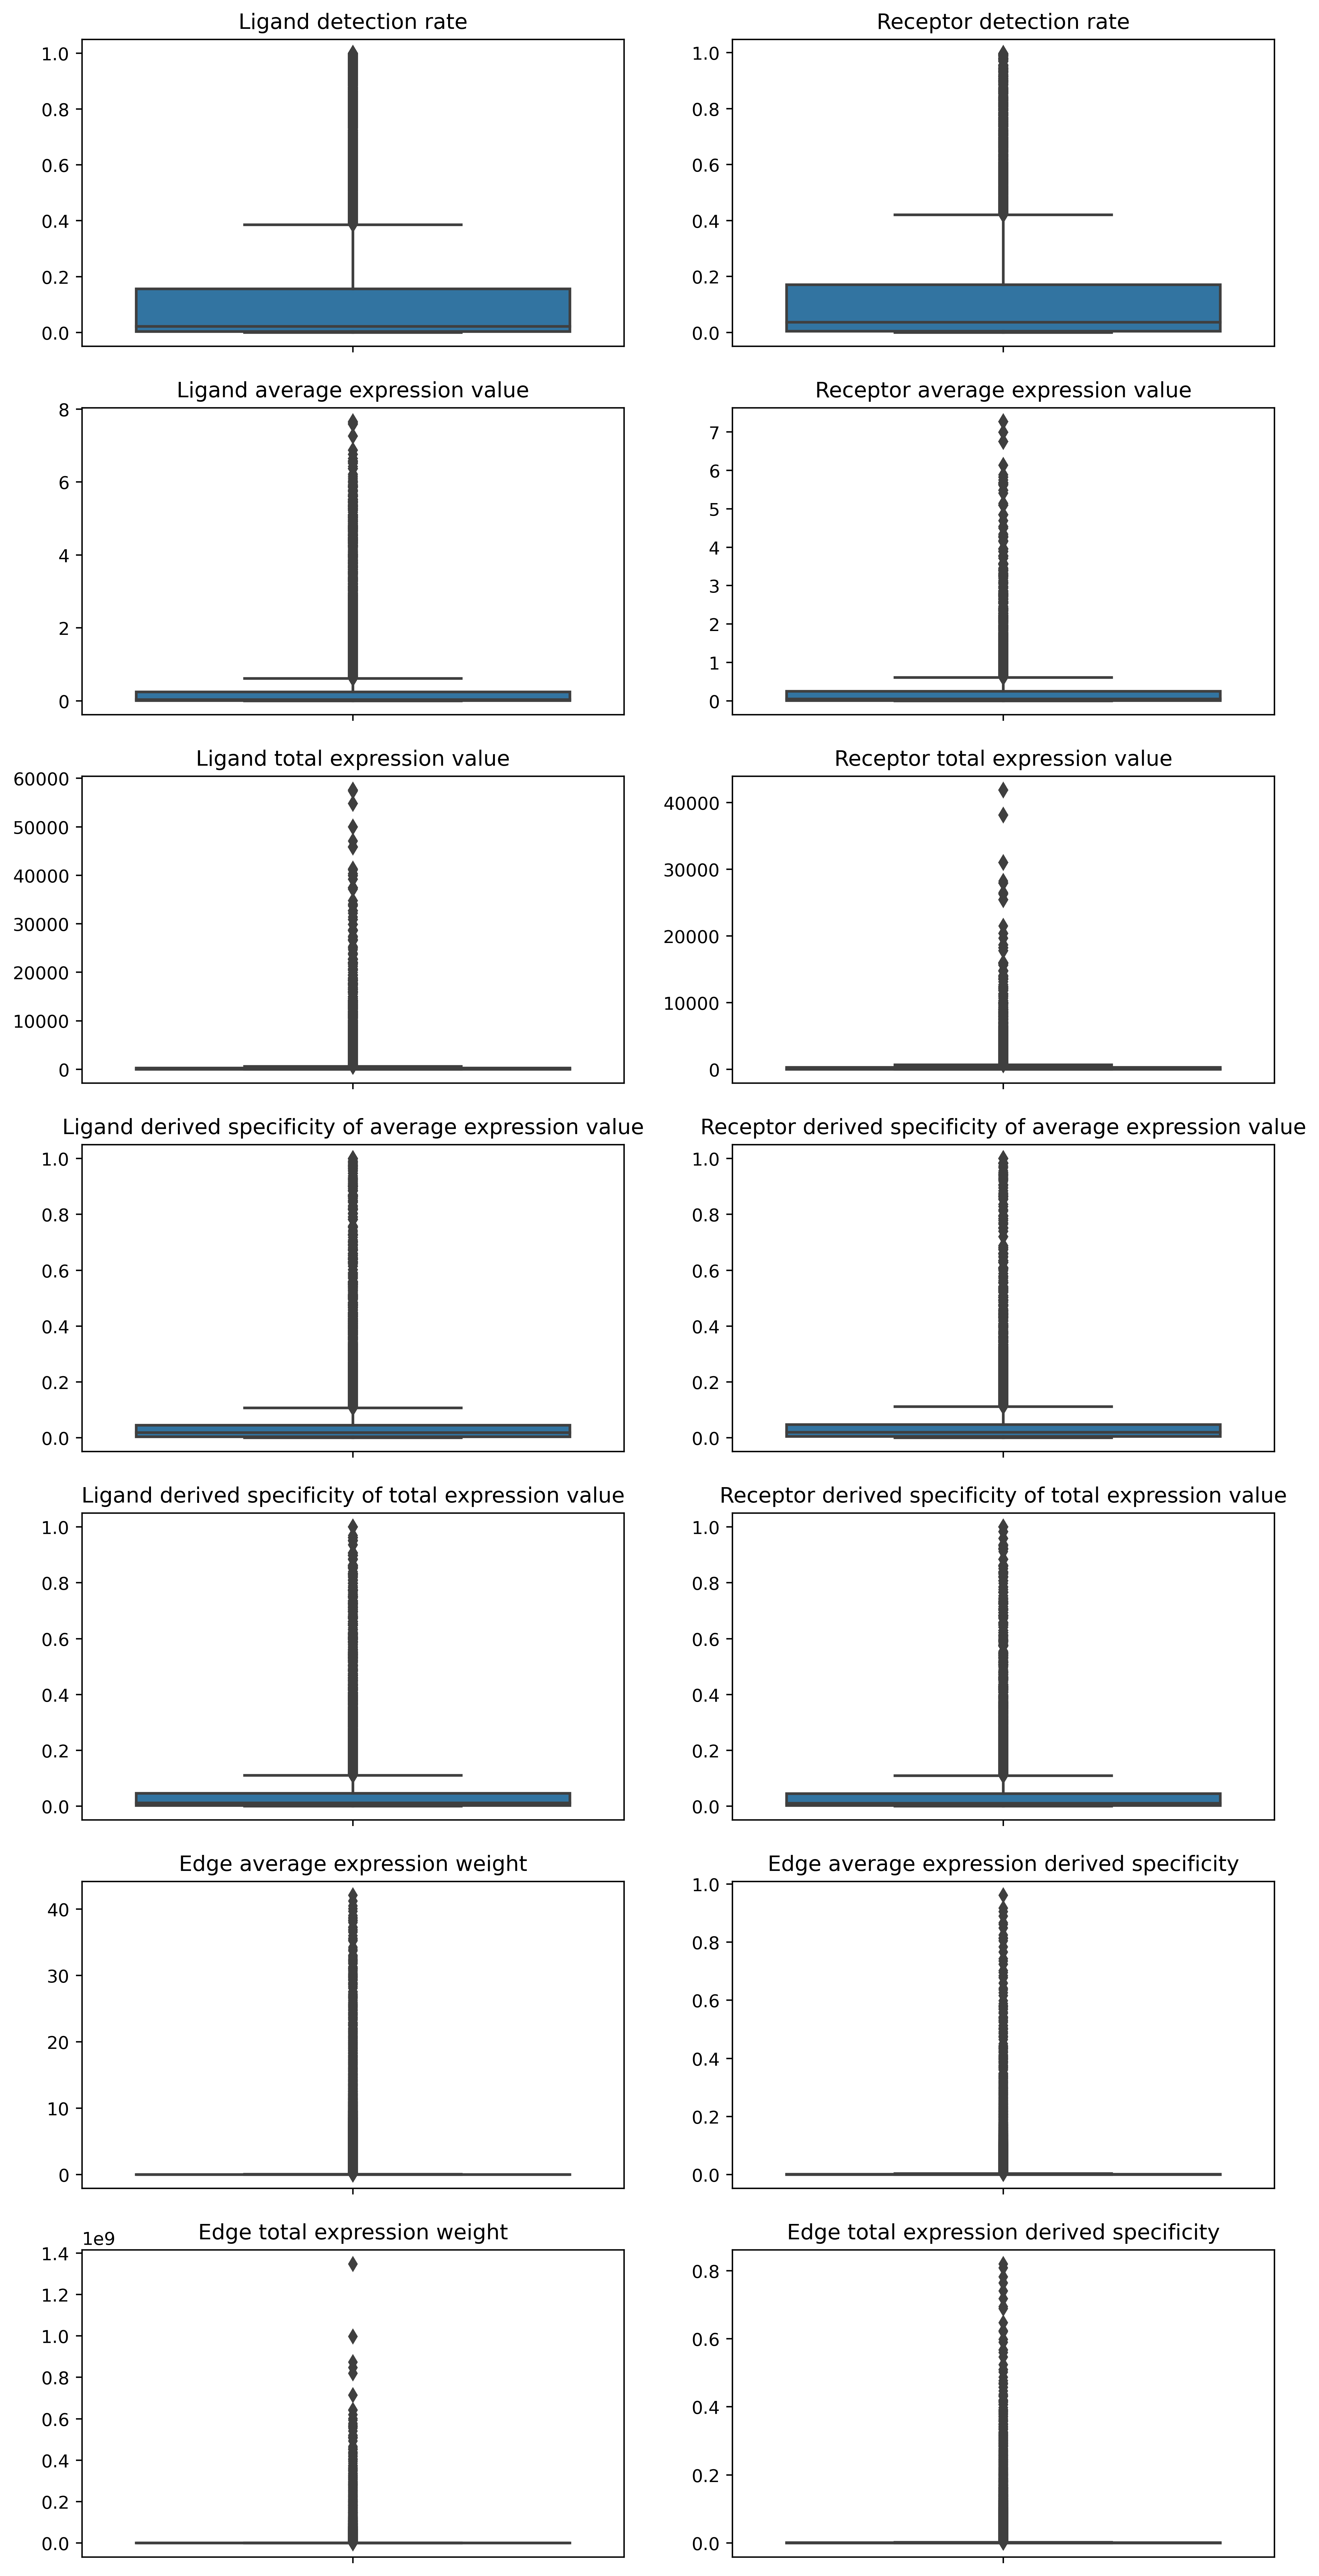

In [5]:
# sns.reset_orig() # reset size of figure
columns = ['Ligand detection rate', 'Receptor detection rate',
           'Ligand average expression value', 'Receptor average expression value', 
           'Ligand total expression value','Receptor total expression value',
           'Ligand derived specificity of average expression value','Receptor derived specificity of average expression value',
           'Ligand derived specificity of total expression value', 'Receptor derived specificity of total expression value',          
           
           'Edge average expression weight',
           'Edge average expression derived specificity',
           'Edge total expression weight',
           'Edge total expression derived specificity']

fig, ax = plt.subplots(int(len(columns)/2), 2)
fig.set_size_inches(12, 26)
ax = ax.ravel()

for idx in range(len(columns)):
    sns.boxplot(ax=ax[idx], y=columns[idx], data=df).set(title=columns[idx], ylabel='');

##### ROI:

In [6]:
df.columns

Index(['Sending cluster', 'Ligand symbol', 'Receptor symbol', 'Target cluster',
       'Ligand-expressing cells', 'Ligand detection rate',
       'Ligand average expression value', 'Ligand total expression value',
       'Ligand derived specificity of average expression value',
       'Ligand derived specificity of total expression value',
       'Receptor-expressing cells', 'Receptor detection rate',
       'Receptor average expression value', 'Receptor total expression value',
       'Receptor derived specificity of average expression value',
       'Receptor derived specificity of total expression value',
       'Edge average expression weight',
       'Edge average expression derived specificity',
       'Edge total expression weight',
       'Edge total expression derived specificity'],
      dtype='object')

In [31]:
sort_by = 'Edge average expression weight'
# sort_by = 'Edge average expression derived specificity'
# sort_by = 'Edge total expression weight'
# sort_by = 'Edge total expression derived specificity'

avg_specificity_threshold  = 0 #0.01
total_specificity_threshold = 0 #0.02
detection_threshold = 0.7
avg_expression_threshold = 1

filter_GEP = False


################################ filter ################################

df_filtered = df[(df['Receptor detection rate']>detection_threshold) & 
                 (df['Ligand detection rate']>detection_threshold)]

df_filtered = df_filtered[(df_filtered['Receptor average expression value']>avg_expression_threshold) &
                          (df_filtered['Ligand average expression value']>avg_expression_threshold)]
# df_filtered = df_filtered[(df_filtered['Receptor total expression value']>avg_expression_threshold) &
#                           (df_filtered['Ligand total expression value']>avg_expression_threshold)]

df_filtered = df_filtered[(df_filtered['Receptor derived specificity of average expression value']>avg_specificity_threshold) &
                          (df_filtered['Ligand derived specificity of average expression value']>avg_specificity_threshold)]

df_filtered = df_filtered[(df_filtered['Receptor derived specificity of total expression value']>total_specificity_threshold) &
                          (df_filtered['Ligand derived specificity of total expression value']>total_specificity_threshold)]


if filter_GEP:
    print(f'GEP siganls are filtered out')
    df_filtered = df_filtered[df_filtered[['Sending cluster', 'Target cluster']].apply(lambda x: not 'GEP' in x['Sending cluster'] and not 'GEP' in x['Target cluster'], axis=1)]

print(f'Number of pairs in filtered df is: {len(df_filtered)}')
################################ show ################################



pd.set_option('display.max_rows', None)
print_df = df_filtered.sort_values(sort_by, ascending = False).reset_index(drop=True).iloc[:]
print_df

Number of pairs in filtered df is: 3753


Sending cluster Ligand symbol Receptor symbol     Target cluster  \
0               GEP_#18           MIF            CD74  Myeloid_cluster_1   
1               GEP_#13           MIF            CD74  Myeloid_cluster_1   
2               GEP_#18           MIF            CD74  Myeloid_cluster_7   
3               GEP_#12           MIF            CD74  Myeloid_cluster_1   
4               GEP_#13           MIF            CD74  Myeloid_cluster_7   
5               GEP_#18           MIF            CD74  Myeloid_cluster_8   
6                GEP_#2           MIF            CD74  Myeloid_cluster_1   
7               GEP_#12           MIF            CD74  Myeloid_cluster_7   
8                GEP_#1           MIF            CD74  Myeloid_cluster_1   
9               GEP_#13           MIF            CD74  Myeloid_cluster_8   
10              GEP_#10           MIF            CD74  Myeloid_cluster_1   
11               GEP_#4           MIF            CD74  Myeloid_cluster_1   
12               GEP_#2           MIF            CD74  Myeloid_cluster_7   
13              GEP_#12           MIF            CD74  Myeloid_cluster_8   
14               GEP_#1           MIF            CD74  Myeloid_cluster_7   
15              GEP_#10           MIF            CD74  Myeloid_cluster_7   
16              GEP_#11           MIF            CD74  Myeloid_cluster_1   
17               GEP_#4           MIF            CD74  Myeloid_cluster_7   
18               GEP_#2           MIF            CD74  Myeloid_cluster_8   
19               GEP_#1           MIF            CD74  Myeloid_cluster_8   
20              GEP_#10           MIF            CD74  Myeloid_cluster_8   
21               GEP_#4           MIF            CD74  Myeloid_cluster_8   
22              GEP_#11           MIF            CD74  Myeloid_cluster_7   
23              GEP_#20           MIF            CD74  Myeloid_cluster_1   
24              GEP_#11           MIF            CD74  Myeloid_cluster_8   
25              GEP_#18           MIF            CD74  Myeloid_cluster_2   
26              GEP_#15           MIF            CD74  Myeloid_cluster_1   
27              GEP_#13           MIF            CD74  Myeloid_cluster_2   
28              GEP_#20           MIF            CD74  Myeloid_cluster_7   
29              GEP_#18           MIF            CD74      CD8_cluster_5   
30              GEP_#18           MIF            CD74  Myeloid_cluster_9   
31              GEP_#15           MIF            CD74  Myeloid_cluster_7   
32               GEP_#6           MIF            CD74  Myeloid_cluster_1   
33    Myeloid_cluster_3           MIF            CD74  Myeloid_cluster_1   
34              GEP_#13           MIF            CD74      CD8_cluster_5   
35              GEP_#12           MIF            CD74  Myeloid_cluster_2   
36              GEP_#13           MIF            CD74  Myeloid_cluster_9   
37              GEP_#20           MIF            CD74  Myeloid_cluster_8   
38              GEP_#18           MIF            CD74  Myeloid_cluster_6   
39              GEP_#15           MIF            CD74  Myeloid_cluster_8   
40              GEP_#12           MIF            CD74      CD8_cluster_5   
41               GEP_#6           MIF            CD74  Myeloid_cluster_7   
42              GEP_#13           MIF            CD74  Myeloid_cluster_6   
43              GEP_#12           MIF            CD74  Myeloid_cluster_9   
44               GEP_#2           MIF            CD74  Myeloid_cluster_2   
45    Myeloid_cluster_3           MIF            CD74  Myeloid_cluster_7   
46               GEP_#5           MIF            CD74  Myeloid_cluster_1   
47              GEP_#16           MIF            CD74  Myeloid_cluster_1   
48               GEP_#1           MIF            CD74  Myeloid_cluster_2   
49              GEP_#10           MIF            CD74  Myeloid_cluster_2   
50               GEP_#4           MIF            CD74  Myeloid_cluster_2   
51               GEP_#2           MIF            CD74   

##### pairs of a specific group:

In [36]:
groups = ['GEP_#13', 'Myeloid_cluster_4', 'Myeloid_cluster_5', 'CD8_cluster_1'] # NR_mucosal
# groups = ['GEP_#2', 'GEP_#17', 'CD8_cluster_3', 'CD8_cluster_4'] # NR_cutaneous
# groups = ['GEP_#18', 'Myeloid_cluster_2', 'Myeloid_cluster_7', 'Myeloid_cluster_9','CD8_cluster_5'] # R_cutaneous

two_sides = True
NUM_OF_ROWS = 10 # None

########################################
pd.set_option('display.max_rows', NUM_OF_ROWS)
if two_sides:
    res_df = print_df[print_df['Sending cluster'].isin(groups) & print_df['Target cluster'].isin(groups)]
else:
    res_df = print_df[print_df['Sending cluster'].isin(groups) | print_df['Target cluster'].isin(groups)]
res_df

Sending cluster Ligand symbol Receptor symbol     Target cluster  \
126             GEP_#13           MIF            CD74  Myeloid_cluster_5   
192             GEP_#13           MIF            CD74      CD8_cluster_1   
277             GEP_#13           MIF            CD74  Myeloid_cluster_4   
438   Myeloid_cluster_4           MIF            CD74  Myeloid_cluster_5   
534   Myeloid_cluster_5           MIF            CD74  Myeloid_cluster_5   
...                 ...           ...             ...                ...   
3380            GEP_#13          PSAP            LRP1  Myeloid_cluster_5   
3408  Myeloid_cluster_4           GRN        TNFRSF1B  Myeloid_cluster_5   
3432            GEP_#13         SPON2           ITGB2  Myeloid_cluster_4   
3443            GEP_#13          CALR            LRP1  Myeloid_cluster_4   
3459            GEP_#13          CALR            LRP1  Myeloid_cluster_5   

      Ligand-expressing cells  Ligand detection rate  \
126                      2946               0.990918   
192                      2946               0.990918   
277                      2946               0.990918   
438                       788               0.955152   
534                       674               0.917007   
...                       ...                    ...   
3380                     2308               0.776320   
3408                      640               0.775758   
3432                     2127               0.715439   
3443                     2264               0.761520   
3459                     2264               0.761520   

      Ligand average expression value  Ligand total expression value  \
126                          5.668784                   16853.295504   
192                          5.668784                   16853.295504   
277                          5.668784                   16853.295504   
438                          3.481804                    2872.488705   
534                          3.148925                    2314.459796   
...                               ...                            ...   
3380                         1.668917                    4961.689572   
3408                         1.897211                    1565.198715   
3432                         1.641887                    4881.329699   
3443                         1.524391                    4532.013639   
3459                         1.524391                    4532.013639   

      Ligand derived specificity of average expression value  \
126                                            0.045169        
192                                            0.045169        
277                                            0.045169        
438                                            0.027743        
534                                            0.025091        
...                                                 ...        
3380                                           0.024804        
3408                                           0.049503        
3432                                           0.155244        
3443                                           0.027601        
3459                                           0.027601        

      Ligand derived specificity of total expression value  \
126                                            0.059150      
192                                            0.059150      
277                                            0.059150      
438                                            0.010082      
534                                            0.008123      
...                                                 ...      
3380                                           0.041165      
3408                                           0.023283      
3432                                           0.174633      
3443                                           0.041345      
3459                                           0.041345      

      Receptor-expressing cells  Receptor d

In [93]:

LR_pairs = [tuple(v) for v in print_df[['Ligand symbol', 'Receptor symbol']].values.tolist()]
unique_LR_paris = sorted(set(LR_pairs), key=LR_pairs.index)

# print_df

for LR_pair in unique_LR_paris[:1]:
    print(LR_pair)

    curr_pair_df = print_df[(print_df['Ligand symbol']==LR_pair[0]) & (print_df['Receptor symbol']==LR_pair[1])]
    sending_clusters = list(set(curr_pair_df['Sending cluster'].tolist()))
    target_clusters = list(set(curr_pair_df['Target cluster'].tolist()))

target_clusters[2].split('_')    

('MIF', 'CD74')


['Myeloid', 'cluster', '4']

# DEBUG

#### 

Sending cluster -	The cluster that expresses the ligand.

Target cluster -	The cluster that expresses the receptor.

Ligand/receptor symbol -	The official gene symbol of the detected ligand/receptor.

Ligand/receptor-expressing cells -  	Number of cells ligand/receptor is detected in.

Ligand/receptor detection rate	-   The ratio of cells that expressed the ligand/receptor to total cells in the cluster.

Ligand/receptor average expression value -	The average expression level of the ligand/receptor in the cluster.

Ligand/receptor derived specificity of average expression value	-   The ratio of the average expression level of the ligand/receptor in the cluster to the sum of the average expression levels of the ligand/receptor in every cluster.

Ligand/receptor total expression value	-  The total expression level of the ligand/receptor in the cluster.

Ligand/receptor derived specificity of total expression value - 	The ratio of the total expression level of the ligand/receptor in the cluster to the sum of the total expression levels of the ligand/receptor in every cluster.

Edge average expression weight - 	The product of average expression levels of the ligand and the receptor in the corresponding cluster(s).

Edge average expression derived specificity - 	The product of the ligand and receptor derived specificity of average expression values.

Edge total expression weight -  	The product of total expression levels of the ligand and the receptor in the corresponding cluster(s)..

Edge total expression derived specificity - 	The product of the ligand and receptor derived specificity of total expression values.
